# Chapter 6: SARSA

Implementing SARSA for solving the windy gridworld problem.

In [20]:
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt

### Exercise 6.9
King moves 

In [86]:
class WindyGridWorld:
    def __init__(self,actions,stochastic_wind=False):
        self.grid_world=(7,10) #Shape of the gridworld
        self.start_pos=(3,0)
        self.terminal_pos=(3,7)
        self.winds=[0,0,0,1,1,1,2,2,1,0]
        self.actions=actions
        self.action_to_idx={a:i for i, a in enumerate(self.actions)}
        self.stochastic_wind=stochastic_wind
        self.reset()
        
    def reset(self):
        self.current_pos=self.start_pos
    
    def get_possible_actions(self):
        possible_actions=[]
        for x,y in self.actions:
            if (self.current_pos[0]+x>=0 and self.current_pos[0]+x<self.grid_world[0]) and \
                (self.current_pos[1]+y>=0 and self.current_pos[1]+y<self.grid_world[1]):
                possible_actions.append((x,y))
        return possible_actions
        
    def step(self,action):
        x,y=action
        if self.stochastic_wind: 
            wind_random=random.choice([-1,0,1])
        else:
            wind_random=0
        new_pos_x=np.clip(self.current_pos[0]+x+self.winds[self.current_pos[1]]+wind_random,0,self.grid_world[0]-1)
        new_pos_y=self.current_pos[1]+y
        self.current_pos=(new_pos_x,new_pos_y)
        return (new_pos_x,new_pos_y),-1
        

In [87]:
def eps_greedy(Q,s,actions,possible_actions,eps):
    if random.random()<eps:
        ids=Q[s[0],s[1]].argsort()[::-1]
        for id in ids: 
            if actions[id] in possible_actions:
                return actions[id]
    else:
        return random.choice(possible_actions)
    
def train_windy_grid_world(actions,episodes=200,eps=0.1,alpha=0.5,stochastic_wind=False):
    grid_world=WindyGridWorld(actions,stochastic_wind=stochastic_wind)
    Q=np.zeros((*grid_world.grid_world,len(grid_world.actions)))
    time_step_list=[]
    episode_list=[]
    
    for episode in range(episodes):
        grid_world.reset()
        S=grid_world.current_pos
        possible_actions=grid_world.get_possible_actions()
        #Follow eps-greedy to select possible action
        A=eps_greedy(Q,S,grid_world.actions,possible_actions,eps)
        time_step=0
        while S!=grid_world.terminal_pos:
            S_,R=grid_world.step(A)
            possible_actions=grid_world.get_possible_actions()
            #Follow eps-greedy to select possible action
            A_=eps_greedy(Q,S_,grid_world.actions,possible_actions,eps)
            Q[S[0],S[1],grid_world.action_to_idx[A]]+=alpha*(R+Q[S_[0],S_[1],grid_world.action_to_idx[A_]] \
                                                             -Q[S[0],S[1],grid_world.action_to_idx[A]])
            S=S_
            A=A_
            time_step+=1
            #print(S_)
        time_step_list.append(time_step)
        episode_list.append(episode)
    return time_step_list,episode_list

In [96]:
# Run 100 experiments
pg130_x=[]
pg130_y=[]
pg69_1_x=[]
pg69_1_y=[]
pg69_2_x=[]
pg69_2_y=[]

for i in tqdm.tqdm(range(200)):
    actions=[(-1,0),(0,-1),(1,0),(0,1)]
    time_step_list,episode_list=train_windy_grid_world(actions,200)
    pg130_x.append(time_step_list)
    pg130_y.append(episode_list)
    actions=[(-1,0),(0,-1),(1,0),(0,1),(1,1),(-1,-1),(1,-1),(-1,1)]
    time_step_list,episode_list=train_windy_grid_world(actions,200)
    pg69_1_x.append(time_step_list)
    pg69_1_y.append(episode_list)
    actions=[(-1,0),(0,-1),(1,0),(0,1),(1,1),(-1,-1),(1,-1),(-1,1),(0,0)]
    time_step_list,episode_list=train_windy_grid_world(actions,200)
    pg69_2_x.append(time_step_list)
    pg69_2_y.append(episode_list)
pg130_x=np.array(pg130_x).mean(0)
pg130_y=np.array(pg130_y).mean(0)
pg69_1_x=np.array(pg69_1_x).mean(0)
pg69_1_y=np.array(pg69_1_y).mean(0)
pg69_2_x=np.array(pg69_2_x).mean(0)
pg69_2_y=np.array(pg69_2_y).mean(0)

100%|██████████| 200/200 [30:42<00:00,  9.21s/it]


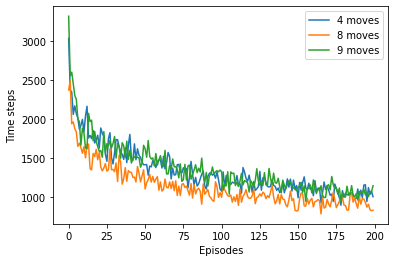

In [97]:
plt.xlabel("Episodes")
plt.ylabel("Time steps")
plt.plot(pg130_x,label='4 moves')
plt.plot(pg69_1_x,label='8 moves')
plt.plot(pg69_2_x,label='9 moves')
plt.legend()
plt.show()

### Exercise 6.10 

Stochastic Winds

In [98]:
# Run 100 experiments
pg130_x=[]
pg130_y=[]
pg69_1_x=[]
pg69_1_y=[]
pg69_2_x=[]
pg69_2_y=[]

for i in tqdm.tqdm(range(200)):
    actions=[(-1,0),(0,-1),(1,0),(0,1)]
    time_step_list,episode_list=train_windy_grid_world(actions,200,stochastic_wind=True)
    pg130_x.append(time_step_list)
    pg130_y.append(episode_list)
    actions=[(-1,0),(0,-1),(1,0),(0,1),(1,1),(-1,-1),(1,-1),(-1,1)]
    time_step_list,episode_list=train_windy_grid_world(actions,200,stochastic_wind=True)
    pg69_1_x.append(time_step_list)
    pg69_1_y.append(episode_list)
    actions=[(-1,0),(0,-1),(1,0),(0,1),(1,1),(-1,-1),(1,-1),(-1,1),(0,0)]
    time_step_list,episode_list=train_windy_grid_world(actions,200,stochastic_wind=True)
    pg69_2_x.append(time_step_list)
    pg69_2_y.append(episode_list)
pg130_x=np.array(pg130_x).mean(0)
pg130_y=np.array(pg130_y).mean(0)
pg69_1_x=np.array(pg69_1_x).mean(0)
pg69_1_y=np.array(pg69_1_y).mean(0)
pg69_2_x=np.array(pg69_2_x).mean(0)
pg69_2_y=np.array(pg69_2_y).mean(0)

100%|██████████| 200/200 [1:02:27<00:00, 18.74s/it] 


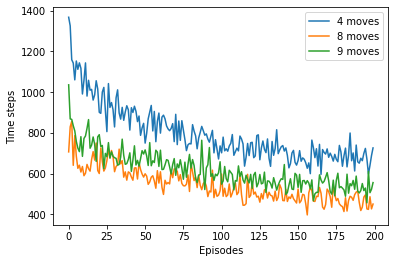

In [99]:
plt.xlabel("Episodes")
plt.ylabel("Time steps")
plt.plot(pg130_x,label='4 moves')
plt.plot(pg69_1_x,label='8 moves')
plt.plot(pg69_2_x,label='9 moves')
plt.legend()
plt.show()